In [1]:
import sys
sys.path.append('../src')
from models import SentimentModelTrainer
import pandas as pd

In [2]:
final_data = pd.read_csv('../data/processed/feature_dataset.csv')

In [3]:
print(final_data['sentiment_category'].value_counts(normalize=True))

sentiment_category
positive    0.787995
negative    0.163099
neutral     0.048907
Name: proportion, dtype: float64


In [4]:
trainer = SentimentModelTrainer()
trainer.prepare_data(final_data)
trainer.define_models()
trainer.train_and_evaluate()

Preparing data for training...
Training set size: 17339
Test set size: 4335
Class distribution in training
sentiment_category
positive    13663
negative     2828
neutral       848
Name: count, dtype: int64
Defined 5 baseline models

Training Logistic Regression

Training Naive Bayes


c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co


Training Linear Support Vector

Training Gradient Boosting

Training Voting Hard
CV Accuracy: 0.87283 (+/- 0.00474)
CV F1 Weighted: 0.84591 (+/- 0.00706)
Test Accuracy: 0.88143
Test F1 Weighted: 0.85539


In [5]:
comparison_df = trainer.compare_models()


			MODEL COMPARISON RESULTS
                Model  CV_Accuracy_Mean  CV_Accuracy_STD  CV_F1_Mean  CV_F1_STD  Test_Accuracy  Test_F1  Training_Time  Inference_Time  Time_Taken
Linear Support Vector          0.870926         0.006531    0.871581   0.005238       0.874048 0.875649         3.1965          0.3196     3.51615
  Logistic Regression          0.826979         0.008094    0.848388   0.005681       0.832757 0.853790         3.5006          0.4044     3.90507
          Voting Hard          0.872830         0.002371    0.845913   0.003531       0.881430 0.855391       125.9139          0.5432   126.45713
    Gradient Boosting          0.842090         0.001397    0.803796   0.002453       0.849827 0.814375        40.1649          0.3435    40.50846
          Naive Bayes          0.840591         0.004340    0.797265   0.006540       0.851211 0.813374         2.1560          0.8318     2.98771



Analysis of the best model: Voting Hard


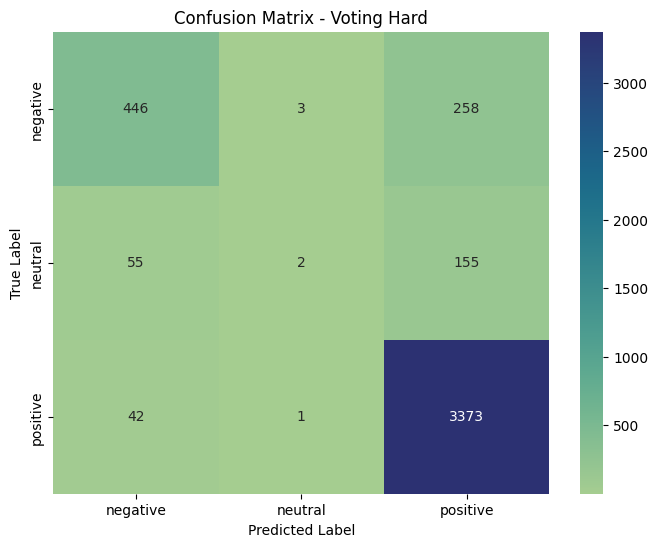

In [6]:
best_model, best_result = trainer.analyze_best_model()

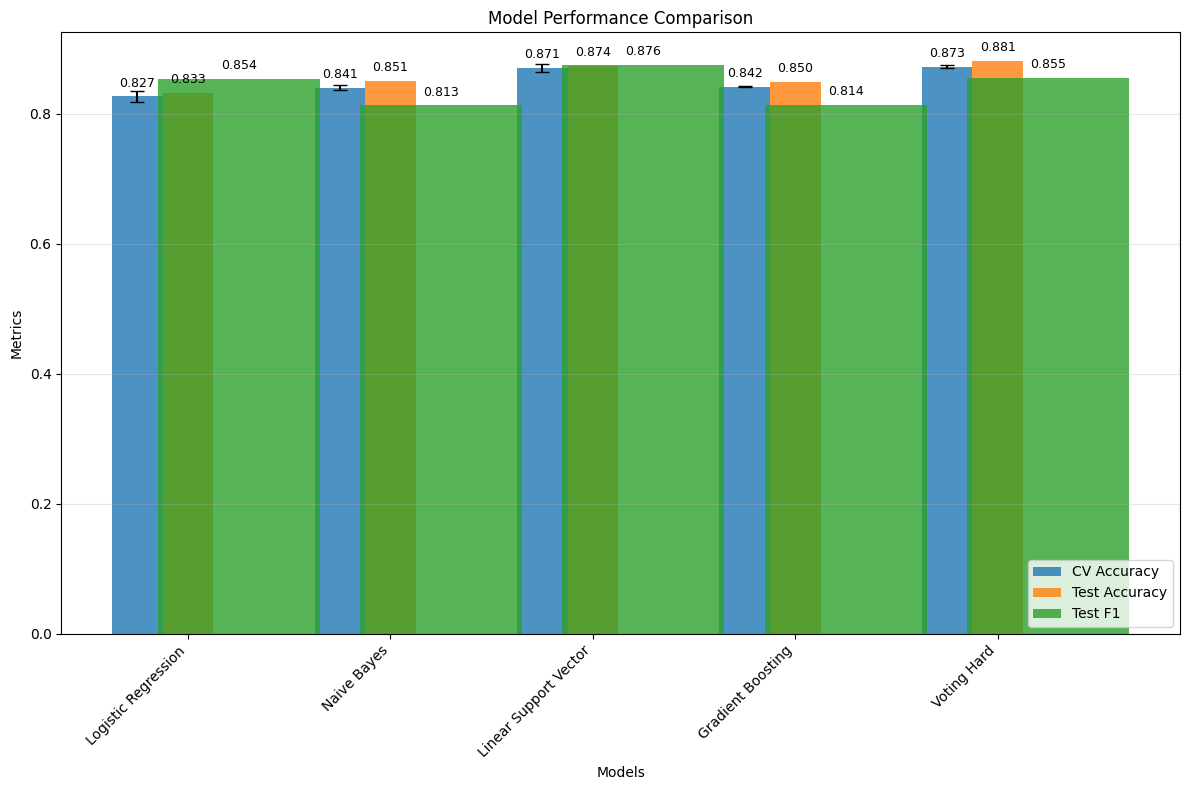

In [7]:
trainer.plot_model_comparison()

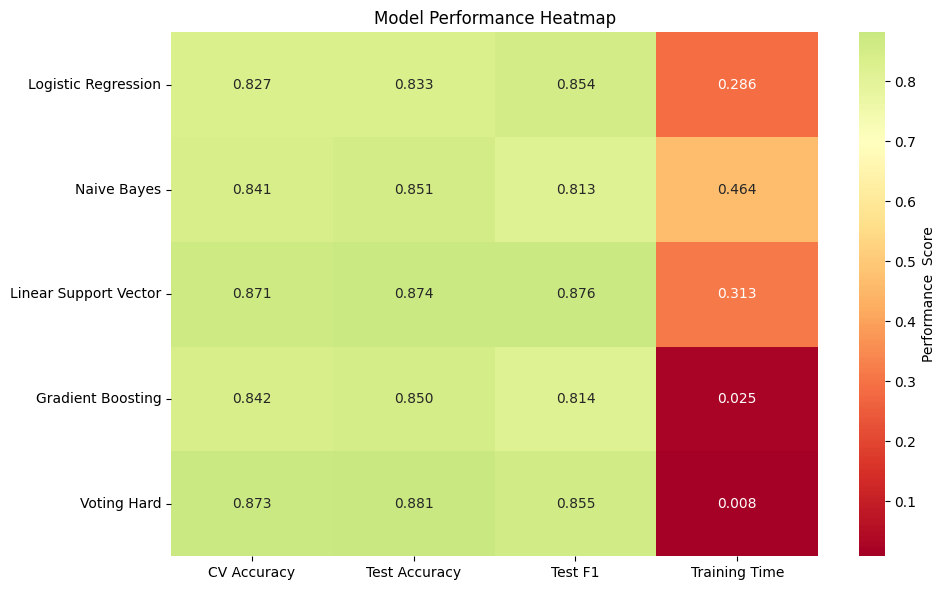

In [8]:
trainer.performance_heatmap()

In [9]:
best_optimized_model, best_params, optimized_accuracy = trainer.optimize_best_model(best_model)

Optimizing Voting Hard
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'classifier__voting': 'soft', 'classifier__weights': None}
Best F1 Score: 0.8548459763991542
Optimized accuracy: 0.887
Improvement: 0.00600


In [10]:
trainer.analyze_features_importance(best_optimized_model, best_model)


Feature Importance Analysis for Voting Hard
The model Voting Hard does not support feature importance
Top 20 Important Features:


In [11]:
trainer.test_model_on_examples(best_optimized_model)


Testing model on example reviews:
Review: Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream. The taste of this was amazing, but the ratio of brownie to sweet cream was disappointing. Liked it regardless but probably won't buy again simply because it didn't live up to its promising package. I'll find another one that has a better ratio and wayyy more yummy chewy brownies. Overall, good flavor, texture, idea, and brownies.
Prediction: positive (confidence: 0.447)
------------------------------


In [12]:
comparison_df.to_csv('../results/model_comparison.csv', index=False)
print("\nResults saved to '../results/model_comparion.csv'")


Results saved to '../results/model_comparion.csv'


In [13]:
import joblib
joblib.dump(best_optimized_model, '../models/final_sentiment_model.pkl')
print("Final model saved")

Final model saved


In [14]:
model_docs = {
    'model_type': best_model,
    'test_accuracy': optimized_accuracy,
    'best_parameters': best_params,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'features_used': 'TF-IDF (5000 features) + text statistics',
    'classes': ['negative', 'neutral', 'positive']
}

In [15]:
import json
with open('../models/model_documentation.json', 'w') as f:
    json.dump(model_docs, f, indent=2)